#### PROJECT OBJECTIVE

TRAIN A PREDICTION MODEL THAT ESTIMATES THE ANNUAL TURNOVER A GIVEN RESTAURANT WITHIN INDIA IS LIKELY TO GENERATE ANNUALLY 

### IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

### DATA LOADING AND CLEANING

In [271]:
raw_data = pd.read_csv('Indian_train.csv', na_values=['Not Specific', '-1'])

In [272]:
data = raw_data.copy()

In [276]:
data.columns = data.columns.astype(str).str.lower().str.replace(' ', '_').str.strip()

In [ ]:
## PRELIMINARY INSPECT DATA SHAPE
# data.head()

In [ ]:
# print(f'Shape: {data.shape}')


In [ ]:
# data.info(show_counts=True)

DATA CONTAINS 3493 ROWS AND 34 COLUMNS WITH FOUR COLUMNS SHOWING SIGNIFICANT NULL VALUES

DATA CONSISTS OF COLUMNS OF VARIOUS OBJECT TYPES

##### DIMENSIONALITY REDUCTION

In [ ]:
## data does not contain any duplicate rows
# data.duplicated(subset='Registration Number').all()

In [ ]:
# data.isna().sum().sort_values(ascending=False).multiply(100) / data.shape[0]

In [11]:
## as per the data dictionary, na values within the rating columns indicate that the associated services are not offered
## live sports rating, value deals rating and comedy gigs rating
## this variables contains no useful information for this analysis as they are practically empty 
## drop Live Sports Rating
# data = data.drop(columns=['Live Sports Rating', 'Value Deals Rating', 'Comedy Gigs Rating'])

In [ ]:
# msno.matrix(data)

In [13]:
## registration number is a unique identifier column
## annual turnover is the target column for my prediction model

In [14]:
# object_data = data.select_dtypes('object')

In [15]:
# object_data['Restaurant Type'].value_counts()

Bar                         3235
Caffee                       212
Gastro Bar                    45
Buffet/Family Restaurant       1
Name: Restaurant Type, dtype: int64

In [16]:
## the restaurant type column contains low variability 
## this lack of variability reveals little on possible causes for annual turnover 
## it rather introduces noise to the dataset
# data = data.drop(columns=['Restaurant Type'])

In [17]:
# object_data.drop(columns=['Restaurant Type'], inplace=True)

In [18]:
## extract unique cuisine types from cuisine column
## generate dummy data from the column
## consider dummy data trap
# unique_cuisines = object_data['Cuisine'].unique()
# cuisine_vocab = set()
# for cus in unique_cuisines:
#     # temp = cus.split()
#     cuisine_vocab.update(cus.split(','))
# cuisine_vocab = list(cuisine_vocab)
# for vocab in cuisine_vocab:
#     object_data[vocab] = object_data['Cuisine'].apply(lambda x: 1 if vocab in x else 0)

# ## to avoid dummy variable trap, drop one column from cuisine dummy variables along with cuisine column
# object_data.drop(columns=['Cuisine', 'jewish'], inplace=True)

In [25]:
## string in the city column do not have the same format resulting in simillar rows grouped as different rows
# object_data['City'] = object_data['City'].str.lower().str.strip().str.replace('banglore', 'bangalore')
# city_series = object_data['City'].value_counts()
# cities_to_keep = city_series[city_series > 10].index

# ## consider only cities with rows > 10 for dummy grouping
# ## group all others as 'other_cities'
# ## drop one column because of dummy variable trap
# ## columns containing -1 lack city rows and would be dropped as imputation of values is impossible

# object_data['City'] = object_data['City']\
#                       .apply(lambda x : 'other' if x not in cities_to_keep else x)\
#                       .apply(lambda x : np.nan if x == '-1' else x)
# data['City'] = object_data['City']
# data = data.dropna(subset=['City'])
# object_data = object_data.dropna(subset=['City'])

# ## get dummy variables
# city_dummies =   pd.get_dummies(object_data['City'], prefix="City")
# object_data = pd.concat([object_data, city_dummies], axis=1)

# object_data = object_data.drop(columns=['City'])

In [ ]:
## Restaurant Location
# object_data['Restaurant Location'].value_counts(dropna=False)
# restaurant_location_dummies = pd.get_dummies(object_data['Restaurant Location'])
# restaurant_location_dummies.drop(columns=['Near Business Hub'], inplace=True)

# ## extract dummy values from Restauarant location
# object_data = pd.concat([object_data, restaurant_location_dummies], axis=1)

# object_data.drop(columns=['Restaurant Location'], inplace=True)
# data.drop(columns=['Restaurant Location'], inplace=True)

In [ ]:
## celebrity endorsement
# object_data['Endorsed By'].value_counts(dropna=False)

# ## endorsed by column contain too much missing data to be useful
# ## imputation is also impossible due to lack of avsilable data to make any justifiable imputation
# ## the column would hence be dropped

# object_data = object_data.drop(columns=['Endorsed By'])
# data = data.drop(columns=['Endorsed By'])

In [43]:
# TODO 1. FIND OUT DATE OF DATA COLLECTION OR DATE ANNUAL TURNOVER WAS RECORDED AND CALCULATE BUSINESS AGE FROM THIS
## BIN BUSINESS AGE ROWS AND EXTRACT DUMMY DATA
## dropping opening date till information available
# object_data = object_data.drop(columns=['Opening Day of Restaurant'])
# data = data.drop(columns=['Opening Day of Restaurant'])

In [44]:
# data_themes  = object_data['Restaurant Theme'].value_counts(dropna=False)
# prevalent_themes = data_themes[data_themes > 10].index

# object_data['Restaurant Theme'] = object_data['Restaurant Theme']\
#                                   .apply(lambda x: 'other' if x not in prevalent_themes else x)

# theme_dummies =    pd.get_dummies(object_data['Restaurant Theme'], prefix="theme")

# object_data = pd.concat([object_data, theme_dummies], axis=1)

# object_data = object_data.drop(columns=['Restaurant Theme'])
# data = data.drop(columns=['Restaurant Theme'])

# data.drop(columns=['Cuisine', 'City'], inplace=True)

In [51]:
## fill missing values in below cols with the mean of each col
# data['Live Music Rating'] = data['Live Music Rating'].fillna(data['Live Music Rating'].mean()).astype(int)
# data['Ambience'] = data['Ambience'].fillna(data['Ambience'].mean()).astype(int)
# data['Overall Restaurant Rating'] = data['Overall Restaurant Rating'].fillna(data['Overall Restaurant Rating'].mean()).astype(int)

In [52]:
## convert ordinal data to dummy variables
# int_data = data.select_dtypes(int)

# ordinal_cols = int_data.columns[5:]
# # clean_int_data = pd.DataFrame()
# for col in ordinal_cols:
#     mean_value = str(round(int_data[col].mean()))
#     int_data[col] = int_data[col].astype(str).str.replace('0', mean_value).astype(int)
#     dummy_col = pd.get_dummies(int_data[col], prefix=col)
#     dummy_col = dummy_col.drop(columns=[dummy_col.columns[0]])
#     int_data = pd.concat([int_data, dummy_col], axis=1)
#     int_data = int_data.drop(columns=[col])
#     data = data.drop(columns=[col])


# ## facebook popularity quotient and instagram popularity quotient both provide the same value
# ## to elimante noise i would drop facebook popularity quotient as it contains missing values and Resturant Tier
# data = data.drop(columns=['Facebook Popularity Quotient', 'Resturant Tier'])

In [60]:
# data['Instagram Popularity Quotient'] = data['Instagram Popularity Quotient'].fillna(data['Instagram Popularity Quotient'].mean())

# ## normalize instagram popularity quotient column
# data['Instagram Popularity Quotient'] = (data['Instagram Popularity Quotient'] - data['Instagram Popularity Quotient'].mean())\
#                                          / (data['Instagram Popularity Quotient'].std())

In [ ]:
# cleaned_data = pd.concat([data, int_data, object_data], axis=1)


## PREPROCESS FUNCTIONS


In [267]:
## helpler class to store column names
class DataSchema:
    REG_NO = 'registration_number'
    TARGET_COL = 'annual_turnover' 
    CUISINE = 'cuisine'
    CITY = 'city'
    LOCATION = 'restaurant_location'
    OPENING_DAY = 'opening_day_of_restaurant'
    FACEBOOK = 'facebook_popularity_quotient'
    INSTAGRAM = 'instagram_popularity_quotient'
    ENDORSEMENT = 'endorsed_by'
    FIRE_AUDIT = 'fire_audit'
    LIQUOR_LICENSE = 'liquor_license_obtained'
    MULTI_COMPLEX = 'situated_in_a_Multi_Complex'
    PARKING = 'dedicated_parking'
    OPEN_SITTING = 'open_sitting_available'
    TIER = 'resturant_tier'
    CITY_TIER = 'restaurant_city_tier'
    TYPE = 'restaurant_type'
    THEME = 'restaurant_theme'
    ZOMATO ='restaurant_zomato_rating'
    WAIT_TIME = 'order_wait_time'
    STAFF_RESPONSIVENESS = 'staff_responsivness'
    VALUE = 'value_for_money'
    HYGIENE = 'hygiene_rating'
    FOOD_RATING = 'food_rating'
    OVERALL_RATING = 'overall_restaurant_rating'
    MUSIC_RATING = 'live_music_rating'
    COMEDY_GIG = 'comedy_gigs_rating'
    VALUE_DEAL = 'value_deals_rating'
    SPORT_RATING = 'live_sports_rating'
    AMBIENCE = 'ambience'
    LIVELY = 'lively'
    SERVICE = 'service'
    COMFORTABLILITY = 'comfortablility'
    PRIVACY = 'privacy'


In [268]:
ORDINAL_COLUMNS = [
                    DataSchema.TIER,
                    DataSchema.ZOMATO,
                    DataSchema.STAFF_RESPONSIVENESS,
                    DataSchema.VALUE,
                    DataSchema.HYGIENE,
                    DataSchema.FOOD_RATING,
                    DataSchema.OVERALL_RATING,
                    DataSchema.MUSIC_RATING,
                    DataSchema.LIVELY,
                    DataSchema.COMFORTABLILITY,
                    DataSchema.PRIVACY,
            ]



## columns that cause collinearity(give the same data)
DATA_TO_DROP = {
        'collinear_cols' : [
                DataSchema.FACEBOOK,    ## gives same/simillar information as instagram col and contains more missing rows
                DataSchema.CITY_TIER,   ## gives same/simillar information as restaurant tier
                DataSchema.WAIT_TIME,   ## gives same/simillar information as staff response and has less pearson correlation value with target col
                DataSchema.VALUE_DEAL,  ## gives same/simillar information as value for money and has less pearson correlation value with target col
                DataSchema.AMBIENCE,      ## gives same/simillar information as lively
                DataSchema.SERVICE,     ## gives same/simillar information as comfortability

                    ],

        ## columns with too much missing values
        ## where imputation with valid replacement data is also not feasible
        'missing_cols' : [
               DataSchema.SPORT_RATING,
               DataSchema.COMEDY_GIG,
               DataSchema.ENDORSEMENT 
                        ],

        ## columns with values of low variance
        'low_variance_cols' : [
                    DataSchema.TYPE
                    ],

        'unnecessary_cols' : [
                    DataSchema.OPENING_DAY,
                    DataSchema.REG_NO
                        ],
}

In [269]:
def drop_missing_rows(df: pd.DataFrame, col:str):
   df = df.dropna(subset=col)
   return df


def process_cuisines(cusine_col: pd.Series) -> pd.DataFrame:
   """ extract unique cuisine types from cuisine column
       and generate dummy data from the column
   """
   temp_df = pd.DataFrame()
   cuisine_vocab = set()

   unique_cuisines = cusine_col.unique()
   for cus in unique_cuisines:
       cuisine_vocab.update(cus.split(','))

   cuisine_vocab = list(cuisine_vocab)
   for vocab in cuisine_vocab:
       temp_df[f'cuisine_{vocab}'] = cusine_col.apply(lambda x: 1 if vocab in x else 0)

   col_to_drop = temp_df.columns[0]
   temp_df.drop(columns=col_to_drop, inplace=True)
   return temp_df


def process_city(city_col: pd.Series) -> pd.DataFrame:
    """group city column and extract dummy data

    Args:
        city_col (pd.Series): column containing the city variable

    Returns:
        pd.DataFrame: dummy values for city variable
    """

    ## string in the city column do not have the same format resulting in simillar rows grouped as different rows
    city_col = city_col.str.lower().str.strip().str.replace('banglore', 'bangalore')
    city_series = city_col.value_counts()
    cities_to_keep = city_series[city_series > 10].index

    ## consider only cities with rows > 10 for dummy grouping
    ## group all others as 'other_cities'
    ## drop one column because of dummy variable trap

    city_col =  city_col\
                .apply(lambda x : 'other' if x not in cities_to_keep else x)\
                .apply(lambda x : np.nan if x == '-1' else x)


    ## get dummy variables
    city_dummies =   pd.get_dummies(city_col, prefix="city")
    col_to_drop = city_dummies.columns[0]
    city_dummies.drop(columns=col_to_drop, inplace=True)
    return city_dummies


def process_theme(theme_col: pd.Series) -> pd.DataFrame:
    data_themes  = theme_col.value_counts(dropna=False)
    prevalent_themes = data_themes[data_themes > 10].index

    theme_col = theme_col\
                .apply(lambda x: 'other' if x not in prevalent_themes else x)

    theme_dummies =  pd.get_dummies(theme_col, prefix="theme")
    col_to_drop = theme_dummies.columns[0]
    theme_dummies.drop(columns=col_to_drop, inplace=True)
    return theme_dummies


def process_ordinal_cols(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    temp_df = pd.DataFrame()
    for col in cols:
        mean_value = round(df[col].mean())
        df[col] = df[col].fillna(mean_value).apply(lambda x: mean_value if x == 0 else x).astype(int)
        dummy_col = pd.get_dummies(df[col], prefix=col)
        dummy_col = dummy_col.drop(columns=[dummy_col.columns[0]])
        temp_df = pd.concat([temp_df, dummy_col], axis=1)
    return temp_df


def process_location(location_col: pd.Series) -> pd.DataFrame:
    location_dummies = pd.get_dummies(location_col, prefix='location')
    location_dummies.drop(columns=[location_dummies.columns[0]], inplace=True)
    return location_dummies

def process_instagram(instagram_col: pd.Series) -> pd.Series:
    mean_value = instagram_col.mean()
    std_value = instagram_col.std()
    instagram_col = instagram_col.fillna(mean_value)

    # normalize instagram popularity quotient column
    normalized_col = (instagram_col - mean_value) / std_value
    return normalized_col

In [270]:
def transform_data(df: pd.DataFrame) -> pd.DataFrame:
    transformed_data = df.copy()

    ## drop unneeded columns
    for category in DATA_TO_DROP:
        transformed_data = transformed_data.drop(columns=DATA_TO_DROP[category])
    
    ## drop rows with value missing in city
    transformed_data = drop_missing_rows(transformed_data, [DataSchema.CITY])

    ## extract dummies
    cusine_dummies = process_cuisines(transformed_data[DataSchema.CUISINE])
    city_dummies = process_city(transformed_data[DataSchema.CITY])
    theme_dummies = process_theme(transformed_data[DataSchema.THEME])
    location_dummy = process_location(transformed_data[DataSchema.LOCATION])
    instagram_column = process_instagram(transformed_data[DataSchema.INSTAGRAM])
    ordinal_dummies = process_ordinal_cols(transformed_data, ORDINAL_COLUMNS)


    ## delete categorical columns from dataset
    dummy_cols = [DataSchema.CUISINE, DataSchema.CITY, DataSchema.THEME, 
               DataSchema.LOCATION, DataSchema.INSTAGRAM, *ORDINAL_COLUMNS]
    for col in dummy_cols:
        transformed_data = transformed_data.drop(columns=[col])



    ## add all dummy columns from categorical data
    dummies = [cusine_dummies, city_dummies, theme_dummies, 
               location_dummy, instagram_column, ordinal_dummies]
    for dummy in dummies:
        transformed_data = pd.concat([
                                        transformed_data, dummy
                                    ], axis=1)

    
    
    return transformed_data

In [275]:
data_transformed = transform_data(data)

## SELECT COLUMNS FOR MODEL TRAINING

<AxesSubplot:>

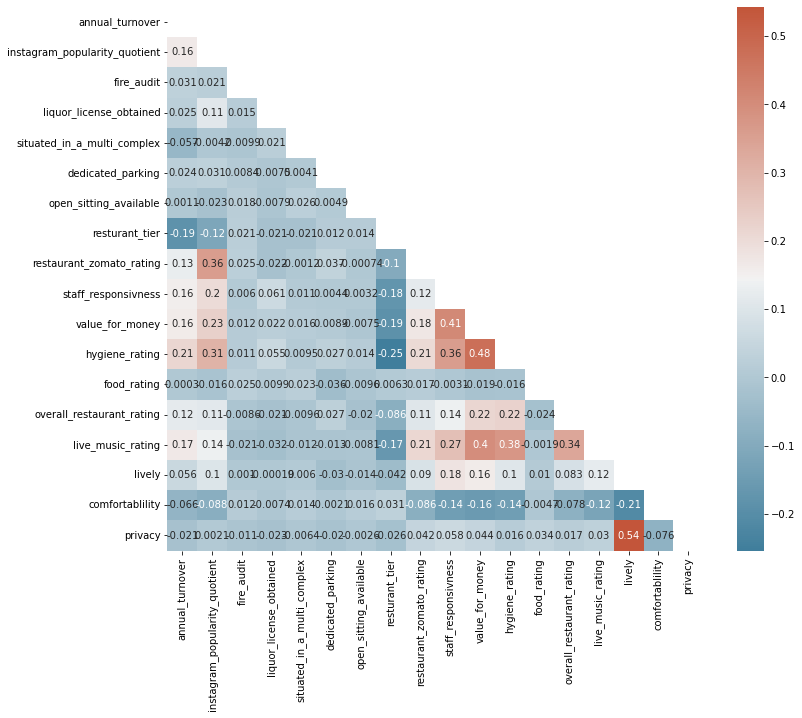

In [294]:

columns_available = list(data.columns)
for elem in DATA_TO_DROP:
    for val in DATA_TO_DROP[elem]:
        if val in columns_available:
            columns_available.remove(val)
columns_available

##
corr = data[columns_available].corr()

# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)